In [12]:
import findspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('heart').getOrCreate()
df = spark.read.load('./gender.csv', format= "csv", header='true')
# hd_data = df.toPandas()
# hd_data.head()

In [13]:
df.show()

+--------------------+----------+-----------+---------+--------+---------+--------+
|          Occupation|  Category|All_workers|M_workers|M_weekly|F_workers|F_weekly|
+--------------------+----------+-----------+---------+--------+---------+--------+
|    Chief executives|MANAGEMENT|       1046|      763|    2251|      283|    1836|
|General and opera...|MANAGEMENT|        823|      621|    1347|      202|    1002|
|Marketing and sal...|MANAGEMENT|        948|      570|    1603|      378|    1258|
|Administrative se...|MANAGEMENT|        170|       96|    1451|       73|     981|
|Computer and info...|MANAGEMENT|        636|      466|    1817|      169|    1563|
|  Financial managers|MANAGEMENT|       1124|      551|    1732|      573|    1130|
|Human resources m...|MANAGEMENT|        254|       68|    1495|      186|    1274|
|Transportation, s...|MANAGEMENT|        276|      224|    1006|       52|     749|
|Education adminis...|MANAGEMENT|        778|      282|    1585|      496|  

In [14]:
df.dtypes

[('Occupation', 'string'),
 ('Category', 'string'),
 ('All_workers', 'string'),
 ('M_workers', 'string'),
 ('M_weekly', 'string'),
 ('F_workers', 'string'),
 ('F_weekly', 'string')]

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gender_data = pd.read_csv('./gender.csv')

print(gender_data.shape)

print(gender_data.dtypes)

print(gender_data.describe())

print(gender_data.Category.value_counts())

gender_data.corr()


(516, 7)
Occupation     object
Category       object
All_workers     int64
M_workers       int64
M_weekly       object
F_workers       int64
F_weekly       object
dtype: object
       All_workers    M_workers    F_workers
count   516.000000   516.000000   516.000000
mean    209.598837   116.525194    93.040698
std     386.182929   232.742854   231.134971
min       0.000000     0.000000     0.000000
25%      20.000000    11.000000     2.000000
50%      63.500000    32.000000    16.000000
75%     203.500000   104.250000    71.000000
max    2806.000000  2582.000000  2262.000000
PRODUCTION                 81
OFFICE                     62
CONSTRUCTION               40
MAINTENANCE                37
TRANSPORTATION             36
HEALTHCARE PROFESSIONAL    33
BUSINESS                   23
SCIENCE                    23
ENGINEERING                21
SERVICE                    20
ARTS                       19
SALES                      18
PROTECTIVE SERVICE         18
COMPUTATIONAL              1

,All_workers,M_workers,F_workers
All_workers,1.000000,0.833689,0.831163
M_workers,0.833689,1.000000,0.385875
F_workers,0.831163,0.385875,1.000000


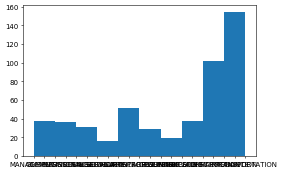

In [16]:
plt.figure(1,dpi=50) 
plt.hist(gender_data['Category'])   
plt.show()

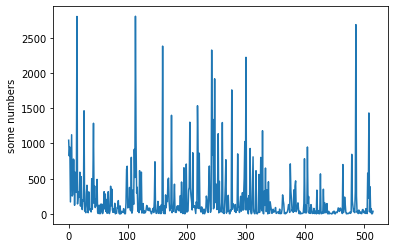

In [17]:
plt.plot(gender_data['All_workers'])
plt.ylabel('some numbers')
plt.show()

In [18]:
df.count(1,2,3)

TypeError: count() takes 1 positional argument but 4 were given

In [19]:
gender_data['All_workers'].sum()

108153

In [20]:
gender_data['M_workers'].sum()

60127

In [21]:
gender_data['F_workers'].sum()

48009

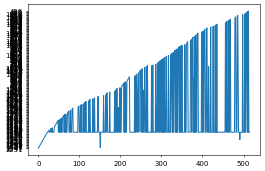

In [22]:
plt.figure(1,dpi=50)
gender_data.sort_values(by=['M_weekly'])
plt.plot(gender_data['M_weekly'])
plt.show()

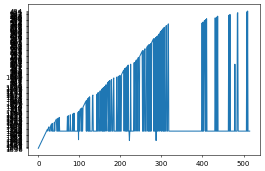

In [23]:
plt.figure(1,dpi=50)
gender_data.sort_values(by=['F_weekly'])
plt.plot(gender_data['F_weekly'])
plt.show()

In [24]:
print(gender_data.loc[gender_data['Occupation'] != 'Na'].count())
print(gender_data.loc[gender_data['Category'] != 'Na'].count())
print(gender_data.loc[gender_data['All_workers'] != 'Na'].count())
print(gender_data.loc[gender_data['M_workers'] != 'Na'].count())
print(gender_data.loc[gender_data['F_workers'] != 'Na'].count())
print(gender_data.loc[gender_data['M_weekly'] != 'Na'].count())
print(gender_data.loc[gender_data['F_weekly'] != 'Na'].count())

Occupation     516
Category       516
All_workers    516
M_workers      516
M_weekly       516
F_workers      516
F_weekly       516
dtype: int64
Occupation     516
Category       516
All_workers    516
M_workers      516
M_weekly       516
F_workers      516
F_weekly       516
dtype: int64
Occupation     516
Category       516
All_workers    516
M_workers      516
M_weekly       516
F_workers      516
F_weekly       516
dtype: int64
Occupation     516
Category       516
All_workers    516
M_workers      516
M_weekly       516
F_workers      516
F_weekly       516
dtype: int64
Occupation     516
Category       516
All_workers    516
M_workers      516
M_weekly       516
F_workers      516
F_weekly       516
dtype: int64
Occupation     204
Category       204
All_workers    204
M_workers      204
M_weekly       204
F_workers      204
F_weekly       204
dtype: int64
Occupation     167
Category       167
All_workers    167
M_workers      167
M_weekly       167
F_workers      167
F_weekly  

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [25]:
newIncome = gender_data.loc[(gender_data['F_weekly']  != 'Na') & (gender_data['M_weekly'] != 'Na')]
print(newIncome)

                                            Occupation        Category  \
0                                     Chief executives      MANAGEMENT   
1                      General and operations managers      MANAGEMENT   
2                         Marketing and sales managers      MANAGEMENT   
3                     Administrative services managers      MANAGEMENT   
4            Computer and information systems managers      MANAGEMENT   
..                                                 ...             ...   
479                      Production workers, all other      PRODUCTION   
485                                        Bus drivers  TRANSPORTATION   
486             Driver/sales workers and truck drivers  TRANSPORTATION   
508  Laborers and freight, stock, and material move...  TRANSPORTATION   
510                        Packers and packagers, hand  TRANSPORTATION   

     All_workers  M_workers M_weekly  F_workers F_weekly  
0           1046        763     2251        283     

In [26]:
newIncome = gender_data.loc[(gender_data['F_weekly']  != 'Na') & (gender_data['M_weekly'] != 'Na')]
del gender_data['F_weekly']
del gender_data['M_weekly']
del newIncome['M_workers']
del newIncome['F_workers']
del newIncome['All_workers']

print(gender_data)
print(newIncome)

                                    Occupation        Category  All_workers  \
0                             Chief executives      MANAGEMENT         1046   
1              General and operations managers      MANAGEMENT          823   
2                 Marketing and sales managers      MANAGEMENT          948   
3             Administrative services managers      MANAGEMENT          170   
4    Computer and information systems managers      MANAGEMENT          636   
..                                         ...             ...          ...   
511                  Pumping station operators  TRANSPORTATION           18   
512  Refuse and recyclable material collectors  TRANSPORTATION           72   
513                 Mine shuttle car operators  TRANSPORTATION            0   
514          Tank car, truck, and ship loaders  TRANSPORTATION            6   
515         Material moving workers, all other  TRANSPORTATION           37   

     M_workers  F_workers  
0          763        2

In [27]:
gender_data = pd.read_csv('./gender.csv')
gender_data['F_workers'] = pd.to_numeric(gender_data['F_workers'])
gender_data['M_workers'] = pd.to_numeric(gender_data['M_workers'])
gender_data['All_workers'] = pd.to_numeric(gender_data['All_workers'])

newIncome = gender_data.loc[(gender_data['F_weekly']  != 'Na') & (gender_data['M_weekly'] != 'Na')]
newIncome['F_weekly'] = pd.to_numeric(newIncome['F_weekly'])
newIncome['M_weekly'] = pd.to_numeric(newIncome['M_weekly'])
del gender_data['F_weekly']
del gender_data['M_weekly']
del newIncome['M_workers']
del newIncome['F_workers']
del newIncome['All_workers']
print(newIncome)
print(gender_data)

                                            Occupation        Category  \
0                                     Chief executives      MANAGEMENT   
1                      General and operations managers      MANAGEMENT   
2                         Marketing and sales managers      MANAGEMENT   
3                     Administrative services managers      MANAGEMENT   
4            Computer and information systems managers      MANAGEMENT   
..                                                 ...             ...   
479                      Production workers, all other      PRODUCTION   
485                                        Bus drivers  TRANSPORTATION   
486             Driver/sales workers and truck drivers  TRANSPORTATION   
508  Laborers and freight, stock, and material move...  TRANSPORTATION   
510                        Packers and packagers, hand  TRANSPORTATION   

     M_weekly  F_weekly  
0        2251      1836  
1        1347      1002  
2        1603      1258  
3      

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
gender_data = pd.read_csv('./gender.csv')
del gender_data['All_workers']
gender_data['F_workers'] = pd.to_numeric(gender_data['F_workers'])
gender_data['M_workers'] = pd.to_numeric(gender_data['M_workers'])

newIncome = gender_data.loc[(gender_data['F_weekly']  != 'Na') & (gender_data['M_weekly'] != 'Na')]
newIncome['F_weekly'] = pd.to_numeric(newIncome['F_weekly'])
newIncome['M_weekly'] = pd.to_numeric(newIncome['M_weekly'])
newIncome['is_male_high_income'] = newIncome['M_weekly'] > 1000
newIncome['is_female_high_income'] = newIncome['F_weekly'] > 1000
del gender_data['F_weekly']
del gender_data['M_weekly']
del newIncome['M_workers']
del newIncome['F_workers']
print(newIncome)
print(gender_data)

                                            Occupation        Category  \
0                                     Chief executives      MANAGEMENT   
1                      General and operations managers      MANAGEMENT   
2                         Marketing and sales managers      MANAGEMENT   
3                     Administrative services managers      MANAGEMENT   
4            Computer and information systems managers      MANAGEMENT   
..                                                 ...             ...   
479                      Production workers, all other      PRODUCTION   
485                                        Bus drivers  TRANSPORTATION   
486             Driver/sales workers and truck drivers  TRANSPORTATION   
508  Laborers and freight, stock, and material move...  TRANSPORTATION   
510                        Packers and packagers, hand  TRANSPORTATION   

     M_weekly  F_weekly  is_male_high_income  is_female_high_income  
0        2251      1836                 T

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [29]:
print(gender_data)

                                    Occupation        Category  M_workers  \
0                             Chief executives      MANAGEMENT        763   
1              General and operations managers      MANAGEMENT        621   
2                 Marketing and sales managers      MANAGEMENT        570   
3             Administrative services managers      MANAGEMENT         96   
4    Computer and information systems managers      MANAGEMENT        466   
..                                         ...             ...        ...   
511                  Pumping station operators  TRANSPORTATION         17   
512  Refuse and recyclable material collectors  TRANSPORTATION         66   
513                 Mine shuttle car operators  TRANSPORTATION          0   
514          Tank car, truck, and ship loaders  TRANSPORTATION          6   
515         Material moving workers, all other  TRANSPORTATION         32   

     F_workers  
0          283  
1          202  
2          378  
3      

In [51]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.linalg import Vectors
newIncomeSpark = spark.createDataFrame(newIncome)
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(newIncomeSpark)

# # Print the coefficients and intercept for logistic regression
# print("Coefficients: " + str(lrModel.coefficients))
# print("Intercept: " + str(lrModel.intercept))

IllegalArgumentException: 'Field "features" does not exist.\nAvailable fields: Occupation, Category, M_weekly, F_weekly, is_male_high_income, is_female_high_income'

In [ ]:
import pandas as pd

gender_data = pd.read_csv('./gender.csv')
gender_data['F_workers'] = pd.to_numeric(gender_data['F_workers'])
gender_data['M_workers'] = pd.to_numeric(gender_data['M_workers'])
gender_data['All_workers'] = pd.to_numeric(gender_data['All_workers'])

newIncome = gender_data.loc[(gender_data['F_weekly']  != 'Na') & (gender_data['M_weekly'] != 'Na')]
newIncome['F_weekly'] = pd.to_numeric(newIncome['F_weekly'])
newIncome['M_weekly'] = pd.to_numeric(newIncome['M_weekly'])
newIncome['is_male_high_income'] = (newIncome['M_weekly'] > 1000) * 1
newIncome['is_female_high_income'] = (newIncome['F_weekly'] > 1000) * 1
newIncome['income_ratio'] = newIncome['M_weekly'] / newIncome['F_weekly']
del gender_data['F_weekly']
del gender_data['M_weekly']
del newIncome['M_workers']
del newIncome['F_workers']
del newIncome['All_workers']
print(newIncome)
print(gender_data)

# model 1
from pyspark import SparkContext 
from pyspark.sql import SQLContext
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
sc = SparkContext()
sqlContext = SQLContext(sc)
sparkNewIncome=sqlContext.createDataFrame(newIncome)
sparkGender_data=sqlContext.createDataFrame(gender_data)
sparkNewIncome.show()
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
print(sparkNewIncome.columns)
vec_assmebler=VectorAssembler(inputCols=['F_weekly'], outputCol='features')

features_df=vec_assmebler.transform(sparkNewIncome)
print(features_df)

lr = LogisticRegression(labelCol='is_male_high_income')
lr_f = LogisticRegression(labelCol='is_female_high_income')
lrModel = lr.fit(features_df)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

lr_f = LogisticRegression(labelCol='is_female_high_income')

lrModel_f = lr_f.fit(features_df)
print("Coefficients: " + str(lrModel_f.coefficients))
print("Intercept: " + str(lrModel_f.intercept))

# model 2
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

plt.scatter(gender_data['M_workers'], gender_data['F_workers'], color='red', s=30)
plt.xlabel('M_workers')
plt.ylabel('F_workers')
plt.title('Linear Regression FOR ALL JOBS')
p1 = polyfit(gender_data['M_workers'], gender_data['F_workers'], 1)
plt.plot(gender_data['M_workers'], np.polyval(p1,gender_data['M_workers']), 'g-' )
plt.show()

# model 3
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

newGender_data = gender_data.loc[(gender_data['Category']  == 'MANAGEMENT')]
plt.scatter(newGender_data['M_workers'], newGender_data['F_workers'], color='red', s=30)
plt.xlabel('M_workers')
plt.ylabel('F_workers')
plt.title('Linear Regression for MANAGEMENT JOBS')
p1 = polyfit(newGender_data['M_workers'], newGender_data['F_workers'], 1)
plt.plot(newGender_data['M_workers'], np.polyval(p1,newGender_data['M_workers']), 'g-' )
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

newGender_data = gender_data.loc[(gender_data['Category']  == 'COMPUTATIONAL')]
plt.scatter(newGender_data['M_workers'], newGender_data['F_workers'], color='red', s=30)
plt.xlabel('M_workers')
plt.ylabel('F_workers')
plt.title('Linear Regression for COMPUTATIONAL JOBS')
p1 = polyfit(newGender_data['M_workers'], newGender_data['F_workers'], 1)
plt.plot(newGender_data['M_workers'], np.polyval(p1,newGender_data['M_workers']), 'g-' )
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

newGender_data = gender_data.loc[(gender_data['Category']  == 'ARTS')]
plt.scatter(newGender_data['M_workers'], newGender_data['F_workers'], color='red', s=30)
plt.xlabel('M_workers')
plt.ylabel('F_workers')
plt.title('Linear Regression for ARTS JOBS')
p1 = polyfit(newGender_data['M_workers'], newGender_data['F_workers'], 1)
plt.plot(newGender_data['M_workers'], np.polyval(p1,newGender_data['M_workers']), 'g-' )
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

newnewIncome = gender_data.loc[(newIncome['Category']  == 'ARTS')]
plt.scatter(newnewIncome['M_weekly'], newnewIncome['F_weekly'], color='red', s=30)
plt.xlabel('M_weekly')
plt.ylabel('F_weekly')
plt.title('Linear Regression for ARTS JOBS')
p1 = polyfit(newnewIncome['M_weekly'], newnewIncome['F_weekly'], 1)
plt.plot(newnewIncome['M_weekly'], np.polyval(p1,newnewIncome['M_weekly']), 'g-' )
plt.show()